In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('cleanedData.csv')
df.head(5)

,City_A,City_Abbeville,City_Akron,City_Alameda,City_Albany,City_Albuquerque,City_Aldie,City_Aledo,City_Alhambra,City_Allen Park,...,Immune_chronicmonoorepstein-barrvirus,Immune_frequentherpesoutbreaks,Immune_viralinfectionsbecomebacterial,Immune_increasedsusceptibilitytocancer,Reproductive_changesinmenstrualcycle,Reproductive_inconsistentmenstrualcycle,Reproductive_vaginalyeastorbacterialinfections,Reproductive_jockitch,Reproductive_infertilityinbothgenders,Reproductive_hormoneimbalances
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Principal Component Analysis(PCA) to reduce the 145 columns

In [24]:
#Inital Shape
df.shape

(553, 628)

In [25]:
# Extracting mold columns for PCA analysis
moldDF = df.loc[:,'Aspergillus flavus/oryzae':'Rhizopus stolonifer']
moldDF.columns

Index(['Aspergillus flavus/oryzae', 'Aspergillus fumigatus',
       'Aspergillus niger', 'Aspergillus ochraceus',
       'Aspergillus penicillioides', 'Aspergillus restrictus*',
       'Aspergillus sclerotiorum', 'Aspergillus sydowii', 'Aspergillus unguis',
       'Aspergillus versicolor', 'Aureobasidium pullulans',
       'Chaetomium globosum', 'Cladosporium sphaerospermum',
       'Eurotium (Asp.) amstelodami*', 'Paecilomyces variotii',
       'Penicillium brevicompactum', 'Penicillium corylophilum',
       'Penicillium crustosum*', 'Penicillium purpurogenum',
       'Penicillium spinulosum*', 'Penicillium variabile',
       'Scopulariopsis brevicaulis/fusca', 'Scopulariopsis chartarum',
       'Stachybotrys chartarum', 'Trichoderma viride*', 'Wallemia sebi',
       'Acremonium strictum', 'Alternaria alternata', 'Aspergillus ustus',
       'Cladosporium cladosporioides 1', 'Cladosporium cladosporioides 2',
       'Cladosporium herbarum', 'Epicoccum nigrum', 'Mucor amphibiorum*',
    

In [26]:
nan_count = np.sum(moldDF.isnull(), axis = 0)
print(nan_count)

Aspergillus flavus/oryzae           0
Aspergillus fumigatus               0
Aspergillus niger                   0
Aspergillus ochraceus               0
Aspergillus penicillioides          0
Aspergillus restrictus*             0
Aspergillus sclerotiorum            0
Aspergillus sydowii                 0
Aspergillus unguis                  0
Aspergillus versicolor              0
Aureobasidium pullulans             0
Chaetomium globosum                 0
Cladosporium sphaerospermum         0
Eurotium (Asp.) amstelodami*        0
Paecilomyces variotii               0
Penicillium brevicompactum          0
Penicillium corylophilum            0
Penicillium crustosum*              0
Penicillium purpurogenum            0
Penicillium spinulosum*             0
Penicillium variabile               0
Scopulariopsis brevicaulis/fusca    0
Scopulariopsis chartarum            0
Stachybotrys chartarum              0
Trichoderma viride*                 0
Wallemia sebi                       0
Acremonium s

1. Standardaization

In [27]:
# Standardizing the data
scaler = StandardScaler()
data_std = scaler.fit_transform(moldDF)


2.Apply PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_std)  # Apply PCA without specifying n_components to get them all
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Find the number of components for 80-90% of total variance
n_components_80 = np.where(cumulative_var_ratio >= 0.80)[0][0] + 1
print(n_components_80)
n_components_90 = np.where(cumulative_var_ratio >= 0.90)[0][0] + 1
print(n_components_90)


20
25


says i need 25 components to capture 90% of the data

In [29]:
pca = PCA(n_components=25)
principal_components_90 = pca.fit_transform(data_std)
moldDF_PCA = pd.DataFrame(data=principal_components_90, columns=[f'PC{i+1}' for i in range(25)])


3. Examine and Visualize

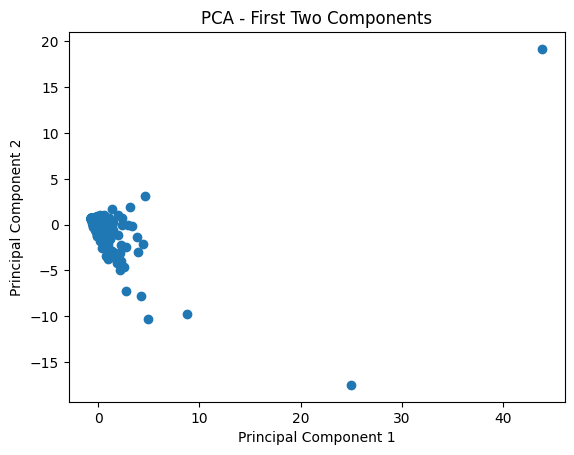

In [30]:
import matplotlib.pyplot as plt
plt.scatter(moldDF_PCA['PC1'], moldDF_PCA['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Components')
plt.show()


Scree Plot

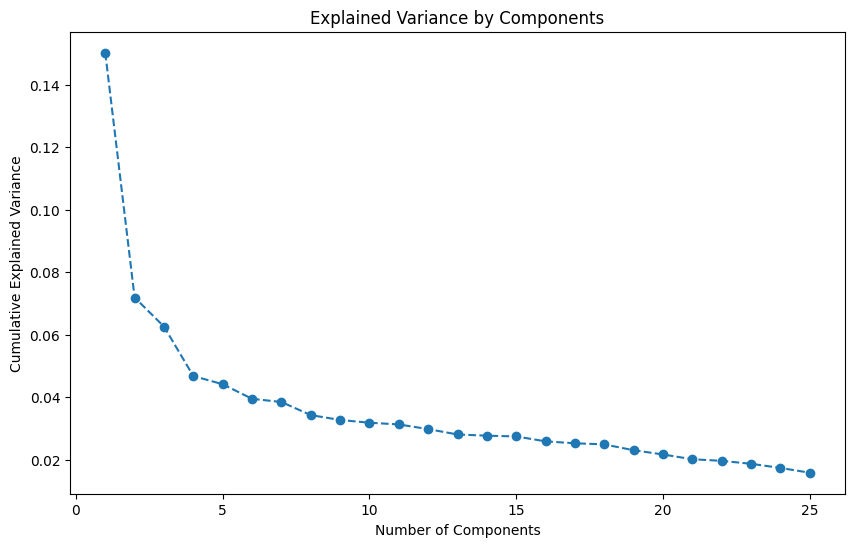

In [31]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


Cumulative Explained Variance Plot

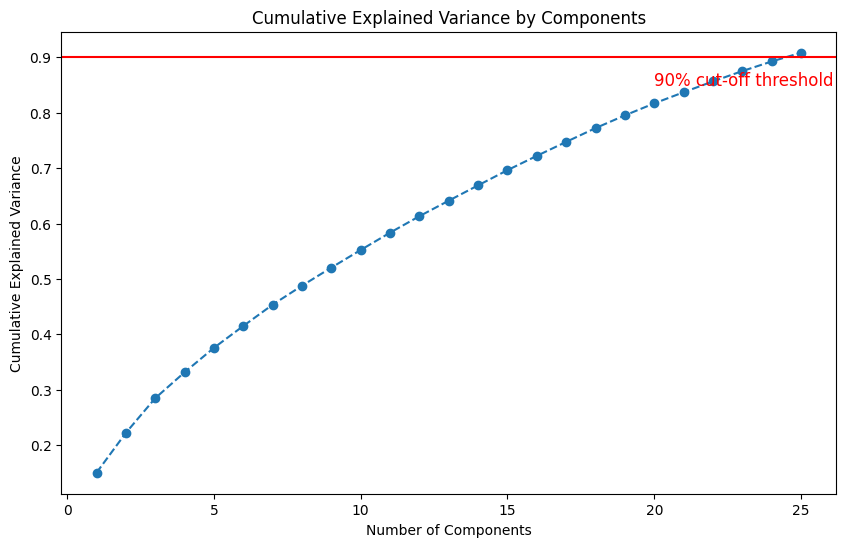

In [32]:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='-')  # Line at 90% variance
plt.text(20, 0.85, '90% cut-off threshold', color = 'red', fontsize=12)
plt.show()


Heatmap plot

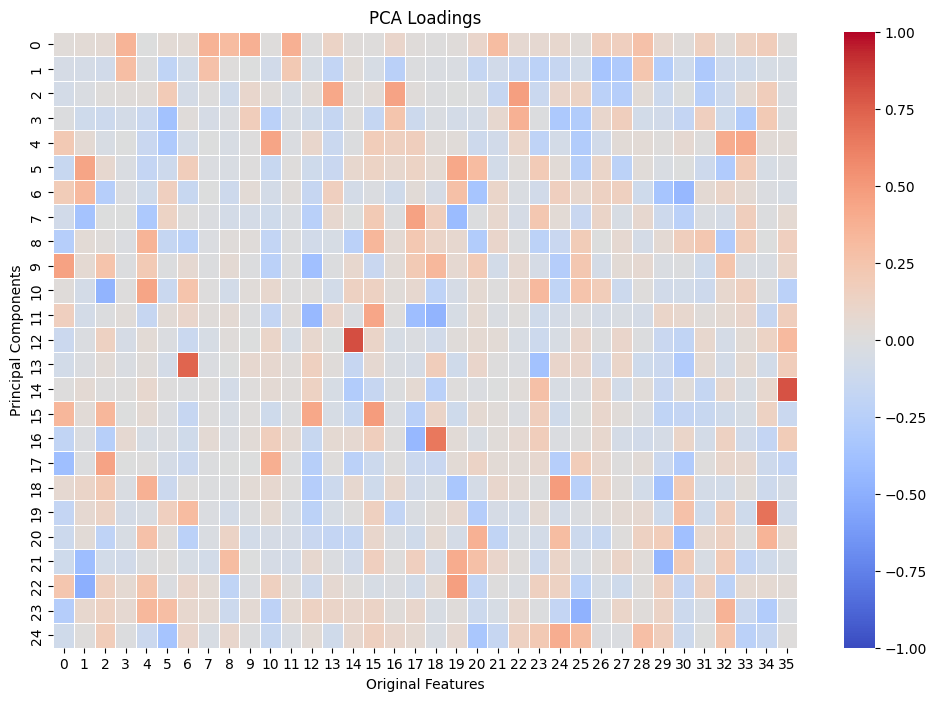

In [33]:
import seaborn as sns

loadings = pca.components_
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=False, cmap='coolwarm',linewidths=0.5, linecolor='white', vmin=-1, vmax=1)
plt.ylabel('Principal Components')
plt.xlabel('Original Features')
plt.title('PCA Loadings')
plt.show()


If there is any correlation above 75% get their names. From there we can observe that the two types are always coexisitng in the data. Check how to set threshold for correlation matrix. 

if they are highly correlated, one of them can be dropped. 

Pair Plot

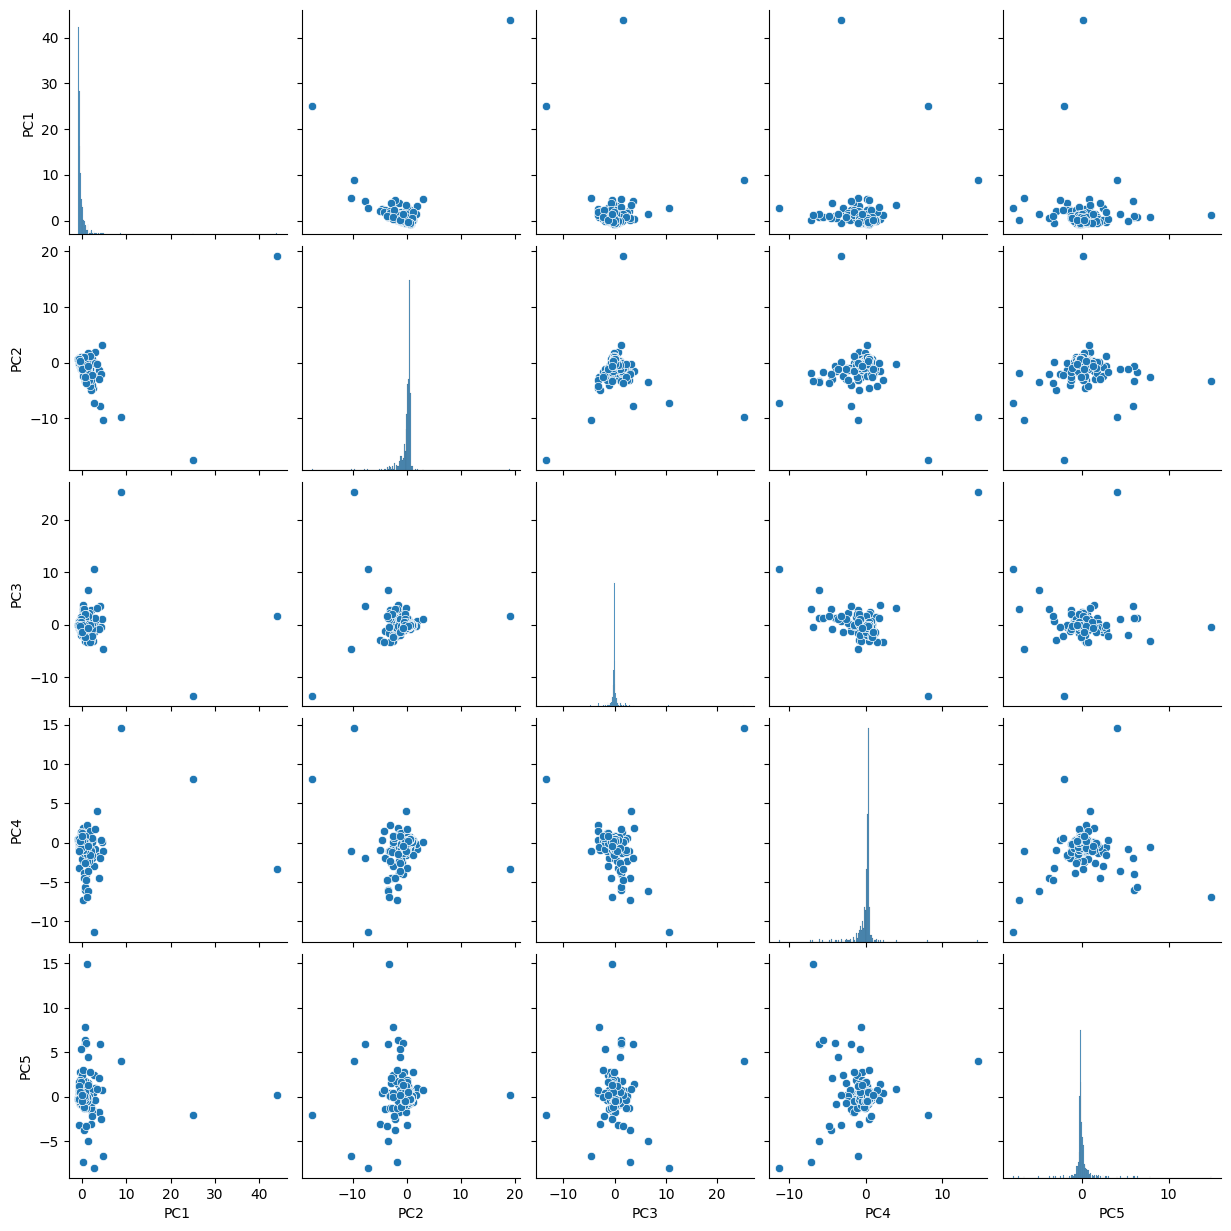

In [34]:
import seaborn as sns

# Selecting first few components for pair plot
pca_pair_df = moldDF_PCA[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]
sns.pairplot(pca_pair_df)
plt.show()


2 Models: City and state & City State and Mold

depending on the outcome, we can determine if city and state have a correlation with the data 
From that we can see what model works the best 



SVC

SVM

Multiclass Classification 

Label encoding: Check file share 